Megan Sisson
DSC 680
Project 2 
Housing Price Prediction - Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings('ignore')

C:\Users\mksis\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data set
df = pd.read_csv('/Users/mksis/Documents/Data Science/680 Applied DS/london_housing_time.csv')
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1/1/1995,city of london,91449,E09000001,17.0,NaN,1
1,2/1/1995,city of london,82203,E09000001,7.0,NaN,1
2,3/1/1995,city of london,79121,E09000001,14.0,NaN,1
3,4/1/1995,city of london,77101,E09000001,7.0,NaN,1
4,5/1/1995,city of london,84409,E09000001,10.0,NaN,1


In [3]:
#See the shape of df
df.shape

(13549, 7)

In [4]:
#see data types
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

In [5]:
#Number of null observations for each column
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [6]:
#Drop no_of_crimes column because too many null values
df = df.drop('no_of_crimes', axis = 1)
df.head()

,date,area,average_price,code,houses_sold,borough_flag
0,1/1/1995,city of london,91449,E09000001,17.0,1
1,2/1/1995,city of london,82203,E09000001,7.0,1
2,3/1/1995,city of london,79121,E09000001,14.0,1
3,4/1/1995,city of london,77101,E09000001,7.0,1
4,5/1/1995,city of london,84409,E09000001,10.0,1


In [7]:
#Create DATE column to reflect date format
df['DATE'] = pd.to_datetime(df['date'])
#df.head()

In [8]:
#Create MONTH column
df['MONTH'] = df['DATE'].dt.month

In [9]:
#Create YEAR column
df['YEAR'] = df['DATE'].dt.year
#df.head()

In [10]:
#groupby month and average_price - finding the average
gb_month = df.groupby(['MONTH'])['average_price'].mean()
gb_month

MONTH
1     262785.685470
2     255134.094942
3     256140.015111
4     257506.877551
5     259872.709333
6     262387.952000
7     265385.471111
8     267579.394667
9     269151.498667
10    268620.352889
11    268663.659556
12    269063.457778
Name: average_price, dtype: float64

[]

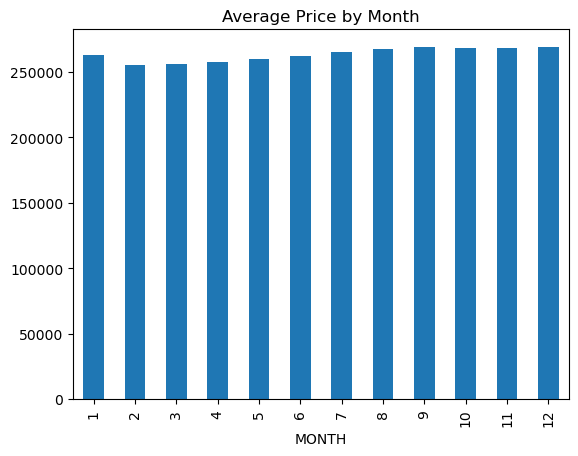

In [11]:
gb_month = df.groupby(['MONTH'])['average_price'].mean().plot(kind = 'bar', title = 'Average Price by Month')
gb_month.plot()

[]

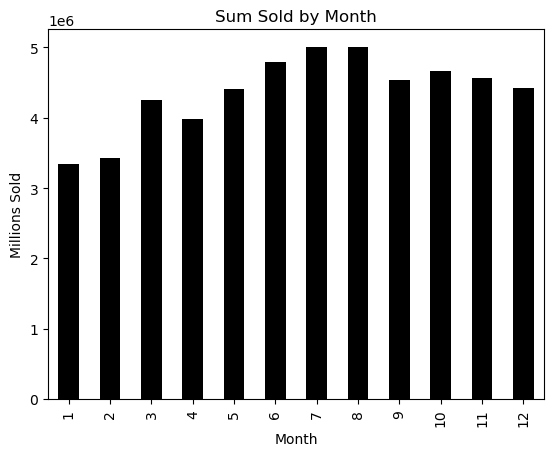

In [12]:
#Number houses sold by month
gb_month_sold = df.groupby(['MONTH'])['houses_sold'].sum().plot(kind = 'bar', title = 'Sum Sold by Month', xlabel = 'Month', ylabel = 'Millions Sold', color = 'black')
gb_month.plot()

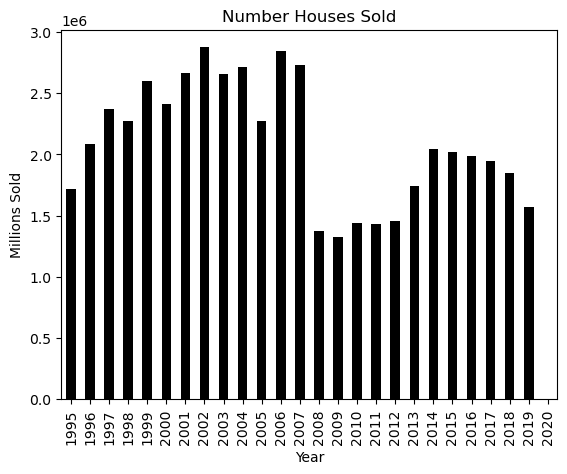

In [13]:
#groupby year to see numbers sold through years
gb_year_sold = df.groupby(['YEAR'])['houses_sold'].sum().plot(kind = 'bar', title = 'Number Houses Sold', ylabel = 'Millions Sold', xlabel = 'Year', color = 'black')


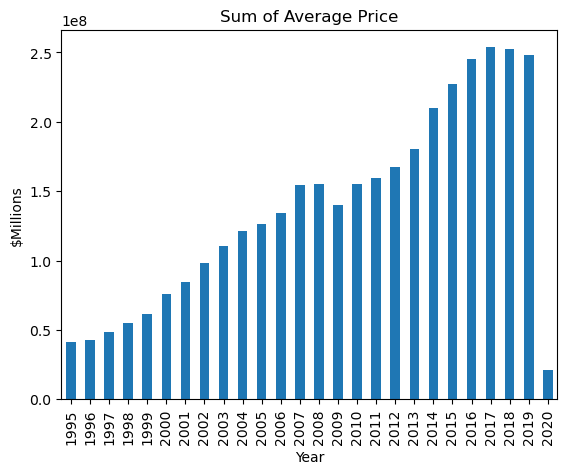

In [14]:
#groupby year to see total sales by year
gb_year = df.groupby(['YEAR'])['average_price'].sum().plot(kind = 'bar', title = 'Sum of Average Price', ylabel = '$Millions', xlabel = 'Year')


<AxesSubplot:title={'center':'Stacked Yearly Ave Price'}, xlabel='Year', ylabel='$Millions'>

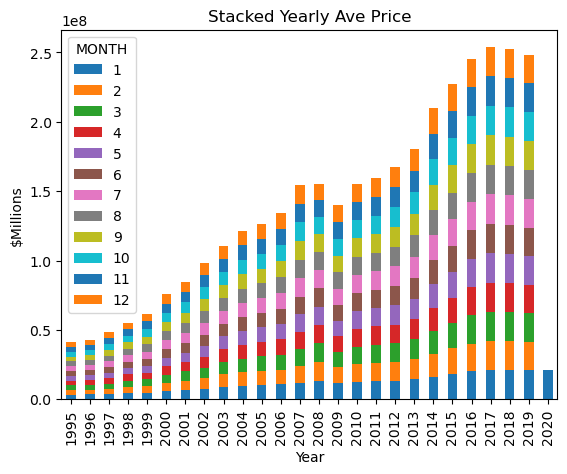

In [15]:
#stacked yearly sales to see monthly average prices
gb_year_stacked = df.groupby(['YEAR', 'MONTH'])['average_price'].sum().unstack()
gb_year_stacked.plot(kind = 'bar', stacked = True, title = 'Stacked Yearly Ave Price', ylabel = '$Millions', xlabel = 'Year')

<AxesSubplot:title={'center':'Average Price of Homes'}, xlabel='Year', ylabel='$Millions'>

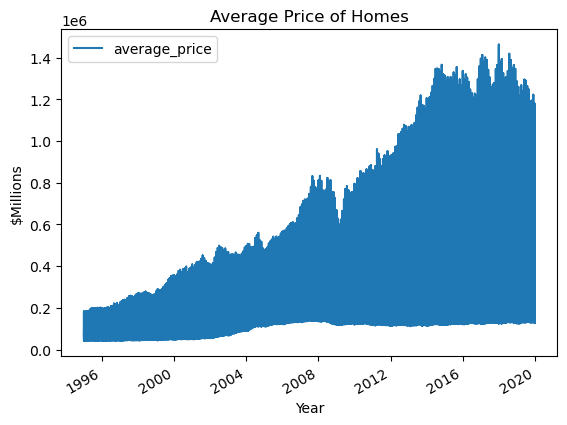

In [16]:
#Line graph of average price timeline
df.plot(x = 'DATE', y = 'average_price', kind = 'line', title = 'Average Price of Homes', ylabel = '$Millions', xlabel = 'Year')

In [17]:
#Order the data frame by DATE
df = df.sort_values(by = ['DATE'])
df

,date,area,average_price,code,houses_sold,borough_flag,DATE,MONTH,YEAR
0,1/1/1995,city of london,91449,E09000001,17.0,1,1995-01-01,1,1995
3013,1/1/1995,greenwich,62300,E09000011,182.0,1,1995-01-01,1,1995
10540,1/1/1995,north east,42076,E12000001,1983.0,0,1995-01-01,1,1995
2709,1/1/1995,enfield,72515,E09000010,327.0,1,1995-01-01,1,1995
10841,1/1/1995,north west,43958,E12000002,5801.0,0,1995-01-01,1,1995
...,...,...,...,...,...,...,...,...,...
4219,1/1/2020,haringey,578728,E09000014,NaN,1,2020-01-01,1,2020
12946,1/1/2020,south east,320700,E12000008,NaN,0,2020-01-01,1,2020
9335,1/1/2020,waltham forest,452299,E09000031,NaN,1,2020-01-01,1,2020
6627,1/1/2020,lambeth,526690,E09000022,NaN,1,2020-01-01,1,2020


In [18]:
#Using the monthly median average_price to group all the monthly data from the different areas
df_gb = df.groupby(['DATE'])['average_price'].median().reset_index()
df_gb

,DATE,average_price
0,1995-01-01,71537.0
1,1995-02-01,71052.0
2,1995-03-01,72016.0
3,1995-04-01,71443.0
4,1995-05-01,70631.0
...,...,...
296,2019-09-01,431498.0
297,2019-10-01,434610.0
298,2019-11-01,431249.0
299,2019-12-01,431245.0


In [19]:
#Set Index
df_set = df_gb.set_index('DATE')


In [20]:
#Dropping unnecessary columns (area, code, houses_sold, borough_flag, MONTH, Year)
#df_set = df_set.drop(columns = ['date', 'area', 'code', 'houses_sold', 'borough_flag', 'MONTH', 'YEAR'])
df_set

,average_price
DATE,
1995-01-01,71537.0
1995-02-01,71052.0
1995-03-01,72016.0
1995-04-01,71443.0
1995-05-01,70631.0
...,...
2019-09-01,431498.0
2019-10-01,434610.0
2019-11-01,431249.0


In [21]:
#splitting the dataset into training and testing
#size of training set will be entire dataframe minus the last 12 months
size = int(len(df_set)-12)
size

289

In [22]:
#training df should be from beginning of dataframe to January 2019
df_train = df_set.iloc[:size]
df_train

,average_price
DATE,
1995-01-01,71537.0
1995-02-01,71052.0
1995-03-01,72016.0
1995-04-01,71443.0
1995-05-01,70631.0
...,...
2018-09-01,441546.0
2018-10-01,435775.0
2018-11-01,438834.0


In [23]:
#testing df should be February 2019-January 2020
df_test = df_set.iloc[size:]
df_test

,average_price
DATE,
2019-02-01,427281.0
2019-03-01,428572.0
2019-04-01,432420.0
2019-05-01,425770.0
2019-06-01,422441.0
2019-07-01,421871.0
2019-08-01,426489.0
2019-09-01,431498.0
2019-10-01,434610.0


In [24]:
#checking for stationarity
stationary_result = df_set.values
adfuller(stationary_result)

#p-value = .84; which is greater than null hypothesis of (p-value > .05); meaning data is non-stationary

(-0.7208559088580269,
 0.8412731779299637,
 16,
 284,
 {'1%': -3.4535872903895797,
  '5%': -2.871771355211212,
  '10%': -2.5722217283277127},
 5280.7016386358055)

In [25]:
#Import library to plot stationality
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error


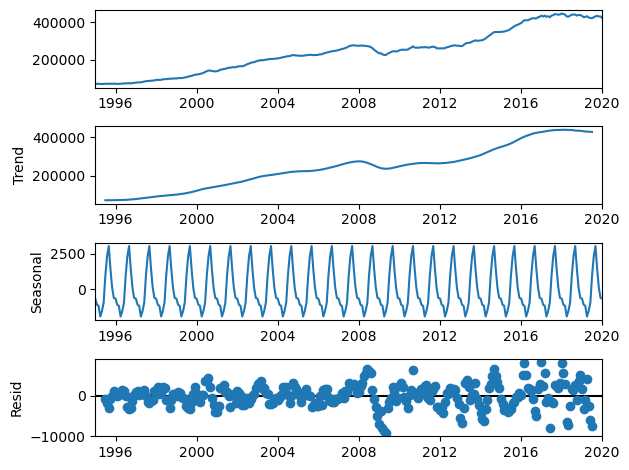

In [26]:
#Finding seasonality
decomposition = sm.tsa.seasonal_decompose(df_set, model = 'additive')
fig = decomposition.plot()
plt.show()

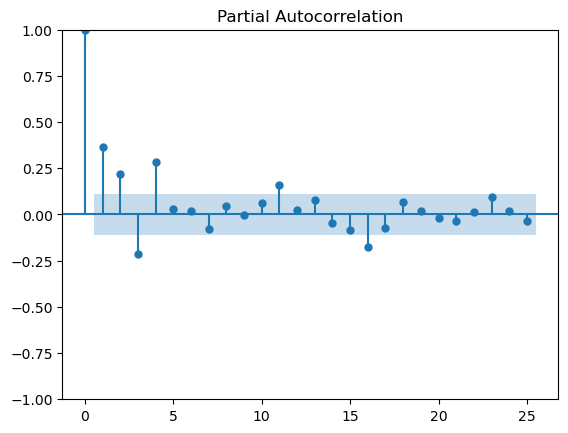

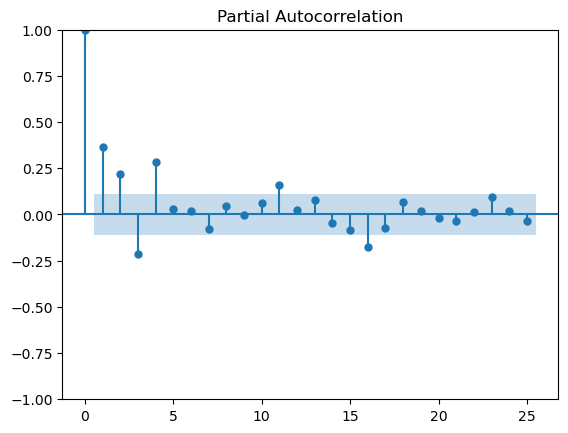

In [27]:
#Finding p
plot_pacf(df_set.average_price.diff().dropna())

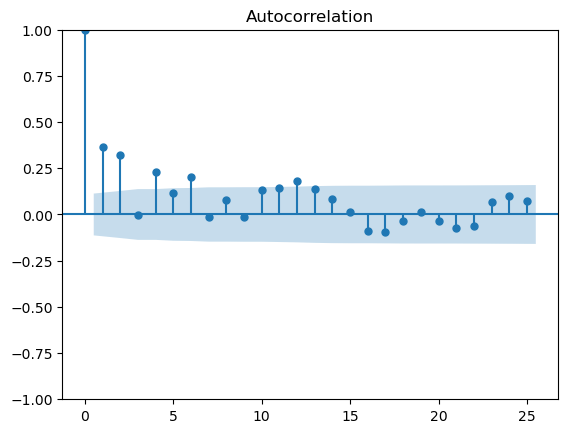

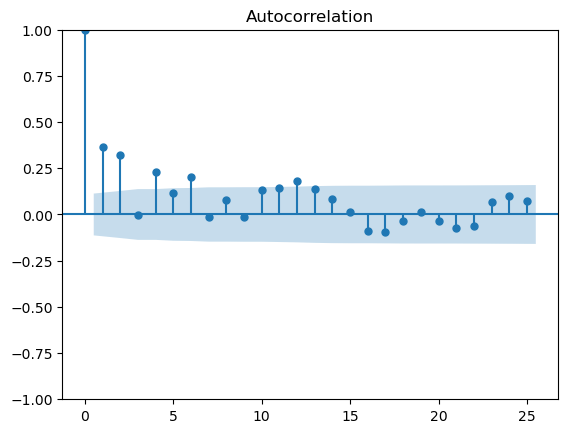

In [28]:
#Finding q
plot_acf(df_set.average_price.diff().dropna())


In [29]:
#ARIMA
p = 6 #p: lag order - # of lag observations
d = 2 #d: degree of differencing - # of times raw observations undergo differencing
q = 5 #q: order of moving average - indicates size of the moving average window

In [30]:
#building model on the training dataset
model = ARIMA(df_train, order = (p, d, q)).fit()
model

In [31]:
#Use model to predict average price of house sales on the last year of data
pred = model.predict(start = len(df_train), end = (len(df_set) - 1))
pred

2019-02-01    430606.689196
2019-03-01    428590.693484
2019-04-01    427803.362719
2019-05-01    428400.061119
2019-06-01    429215.741209
2019-07-01    430022.552920
2019-08-01    430628.688172
2019-09-01    431487.600817
2019-10-01    432719.575256
2019-11-01    434229.589575
2019-12-01    435755.407328
2020-01-01    437099.346203
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
#Root mean squared error
rmse = np.sqrt(mean_squared_error(df_test,pred))
print('RMSE: ', rmse)

#Larger the RMSE, the larger the difference

RMSE:  5774.924101207685


<AxesSubplot:title={'center':'Actual & Predicted'}, xlabel='DATE'>

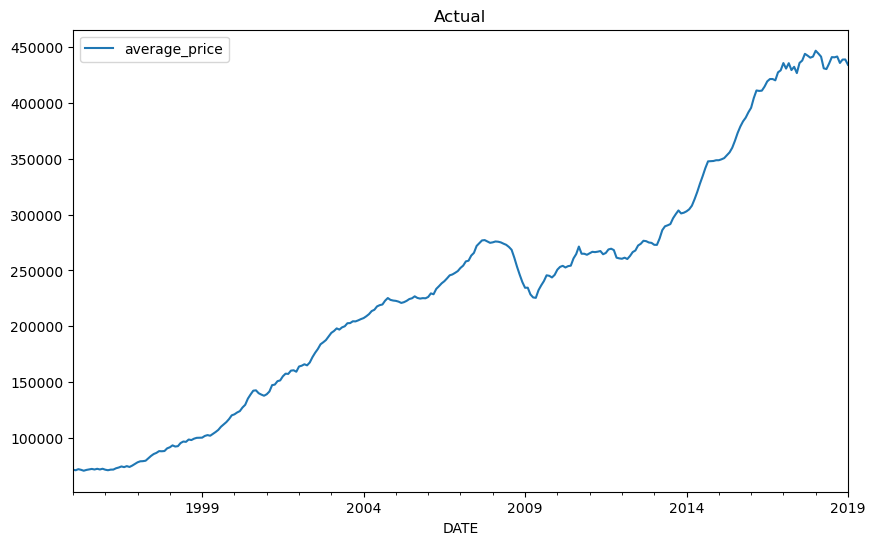

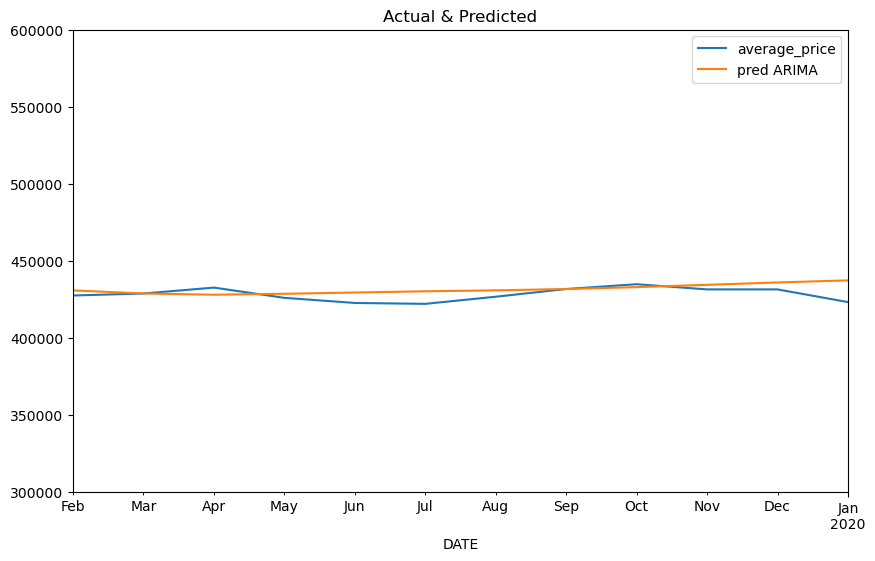

In [33]:
#plotting actual and predicted
df_train.plot(legend = True, label = 'Train', figsize = (10,6), title = 'Actual')
df_test.plot(legend = True, label = 'Test', figsize = (10,6), ylim = (300000, 600000), title= 'Actual & Predicted')
pred.plot(legend = True, label = 'pred ARIMA')